In [9]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.data import Memory
from src.config import DEFAULT_DATA_DIR

sns.set_style("whitegrid", {"grid.color": ".7", "grid.linestyle": ":"})
sns.set_context("notebook")
sns.set_palette("RdYlBu")

In [10]:
# Load the memory

DATA_DIR = Path("..") / DEFAULT_DATA_DIR

memory_raw = json.load(open(f"{DATA_DIR}/memory.json"))
memory = Memory.model_validate(memory_raw)


print(f"Found {len(memory.kernels.search)} kernels search files")

Found 3 kernels search files


In [11]:
# Load kernel search results

df = pd.concat([pd.read_csv(f"{DATA_DIR}/{search.file_name}") for search in memory.kernels.search])

df.sort_values(by="totalVotes", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns}")

Shape: (3300, 5)
Columns: Index(['ref', 'title', 'author', 'lastRunTime', 'totalVotes'], dtype='object')


In [12]:
# Calculate the percentage of popular kernels by total votes threshold

thresholds = [10, 50, 100, 500, 1000, 2500]

rows = []
for t in thresholds:
    mask = df["totalVotes"] >= t
    rows.append({
        "votes_ge": t,
        "count": mask.sum(),
        "share_pct": mask.mean() * 100,
    })

tail_df = pd.DataFrame(rows)
tail_df

,votes_ge,count,share_pct
0,10,471,14.272727
1,50,111,3.363636
2,100,49,1.484848
3,500,2,0.060606
4,1000,1,0.030303
5,2500,0,0.000000


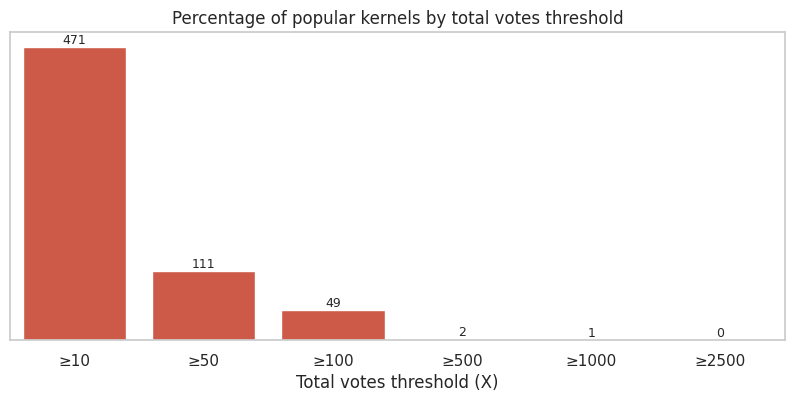

In [13]:
# Plot the percentage of popular kernels by total votes threshold

plt.figure(figsize=(10, 4))

sns.barplot(
    data=tail_df,
    x="votes_ge",
    y="share_pct",
)

plt.xlabel("Total votes threshold (X)")
plt.ylabel("")
plt.yticks([])
plt.xticks(range(len(tail_df)), [f"≥{x}" for x in tail_df["votes_ge"]])
plt.title("Percentage of popular kernels by total votes threshold")

for i, row in tail_df.iterrows():
    plt.text(i, row["share_pct"], int(row["count"]), 
             ha="center", va="bottom", fontsize=9)

plt.show()